# Brief intro to Natural Language Processing (NLP)
## October 12, 2018 PyData Indy \#pydataindy

# <font color=darkorange> A.J. Rader </font> 
# <font color=darkorange> Director of Data Science at DMC Insurance </font>
<img src="images/dmc_logo.jpg"  >

## arader@dmcinsurance.com      
## @indyrader


https://github.com/ajrader/tutorials 

<img src="images/semi_mt.png" width='1000'>



In [1]:
from IPython.display import Image, display
import os
from glob import glob
import pandas as pd

cur_dir = os.path.abspath(os.curdir)
image_dir = os.path.join(cur_dir,'images')
data_dir = os.path.join(cur_dir,'data')
output_dir = os.path.join(cur_dir,'output')


## <font color=darkslateblue> TL;DR $\rightarrow$ NLP involves converting words into numbers and doing math on these numbers in order to identify relationships between the words and documents they live in.

</font><img src="images/library.jpg"  height="800" width = '800'>
<img src="images/number_bits.jpg" height="600" width="600">

## Why NLP?

It is a very broad domain that deals with analyzing and understanding human text and words. Some areas of application include the following:

* text classification/clustering (including spam detection & sentiment analysis)
* machine translation
* language modeling (e.g. predicting the next word given the previous words)
* summarizing blocks of text (to find the main topics/topic sentences or concepts) 
* caption generation
* speech recognition 
* question answering.


<img src="images/words-bis.jpg" alt='WORDS HAVE POWER' width="600" height ="600"> 

Additionally, the input data for NLP is generally unstructured meaning that some of our favorite, go-to tools and approaches won't work without some pre-processing steps and/or thought. 


## My experiences with NLP

Over the years I've used NLP/text mining in several projects including the following.
        
* Characterization of the articles written and posted on a social media site and assign topics to them.
* Identification of Entities (People, Places, Companies, etc.) 
    - used these to connect articles and recommend content.
    - used these to analyze what the articles were being written on in a seasonal way
    - used these to identify what brands the authors were writing about
* Assess sentiment and trends in articles.


* Digest/summarize/group weekly status reports.
* Analyze claims notes in order to identify common features in claims and claims processing as well as trends over time.

<img src="images/SFclaimsClassifier.png" height="600" width="600" alt="Missing file">
        

## <font color= darkslateblue> CLEARLY this is _too  much_ to fully cover in a short talk. </font>

### Goals for today. 
1. Provide an overview of some concepts, terms and methods.
2. Illustrate through a few examples.


### First some key terms/phrases

* _Tokenization_ (breaking text into smaller pieces: i.e. words and sentences)


* _Stopwords_ (non-important words that should be identified and ignored)


* _n-grams_ (groupings of adjacent words) 
    - 1-grams are single words, 2-grams (bi-grams) are 2 consecutive words, 3-grams are three consecutive words etc.
    - a simple way to capture some of the frequent collocalization of specific words/context
    - computational complexity grows rapidly with increasing _n_

  
* _Stemming_ & _Lemmatization_ (how to collapse similar words to a single representation)
    - stemming is rule-based (such as stripping off suffixes)
    - lemmatization is vocabulary + grammar based (requires passing through a set of steps to id the root form of the word)
    - Often you'll have too many tokens in your document to make sense of things. This is one way to reduce the dimensionality.
    - Common examples include plurals or verbs of different tenses
    

* _Part-of-Speech (POS) Tagging_  (identifying and assigning this meta-data to the words in a sentence)
    - adds information to the document; you can think of it as an additional, derived feature
    - helps distinguish different uses of a particular word
 
 

* _Named Entity Recognition (NER)_ (identifying people/places/companies/etc.)
    - can be thought of as an additional feature and means to understand what a document is about.


* _corpus_ (a set of documents)
    - the input; can be split into test and training sets for ML jobs

## <font color=indianred> Start Simply </font>: Represent a set of documents (_corpus_) by a vector space defined by the words present.

* Use the words contained within a set of documents to define a basis set (i.e. set of vectors assumed to be orthogonal to one another) in order to locate a given document within in this resulting (word-based) vector space.
    - so if you have $N$ unique words in your set of $M$ documents then your vector space will have a dimensionality of $N$.
    
* In this approach we're ignoring each word's context and using unigrams. This is the so-called __Bag-of-Words__ approach.

* I'm relying heavily on `python`, especially `sklearn` package.

### Toy example with limited vocabulary.
Consider a simple example where there are only 3 words in your set of documents: 'Airplane','Boat','Car' and every sentence or document is constructed only out of these words.


    
To convert these to an orthogonal basis vector set you can explicitly define
<div class="code-base"><pre class="highlight"><code>
Airplane => [1,0,0]
Boat => [0,1,0]
Car => [0,0,1]
</code></pre></div>

Then you map a given sentence or document into this __vector space__. 
<img src="images/vectorSpace.png" height="200" width="200">



In [2]:
toy_corpus = ["Boat Airplane Airplane Boat Car",
              "Car Airplane Car Boat Car Airplane",
              "Car Car Car Airplane Car Airplane Airplane",
              "Boat Airplane Boat Boat Boat Boat Airplane",
              "Car Car Car Boat Car Airplane",
              "Boat Car Car Boat Car Boat",
              "Car Airplane Boat Airplane Boat Car Airplane"]


The easiest way to do this is to define the number of occurrences of each word as the value along that axis for each word.  For example the following 'sentences' can be expressed as. 

<div class="code-base"><pre class="highlight"><code>
s0 = "Boat Airplane Airplane Boat Car" => [2,2,1]
s1 = "Car Airplane Car Boat Car Airplane" => [2,1,3]
s2 = "Car Car Car Airplane Car Airplane Airplane" => [3,0,4]
s3 = "Boat Airplane Boat Boat Boat Boat Airplane" => [2,5,0]
s4 = "Car Car Car Boat Car Airplane" => [1,1,4]
s5 = "Boat Car Car Boat Car Boat" => [0,3,3]
s6 = "Car Airplane Boat Airplane Boat Car Airplane" => [3,2,2]
</code></pre></div>

Within this framework, the similarity between two known documents (or a query for a document given a corpus) can be measured by the similarity of these vectors (i.e. the distance). Typically cosine similarity is used for this distance. 

This vectorization is implemented in `scikit-learn's CountVectorizer`

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
toy_vectorizer = CountVectorizer()
#print(vectorizer)
toy_vectorizer.fit(toy_corpus)
corpus_vec=toy_vectorizer.transform(toy_corpus).toarray()
print(corpus_vec)

[[2 2 1]
 [2 1 3]
 [3 0 4]
 [2 5 0]
 [1 1 4]
 [0 3 3]
 [3 2 2]]


## visualize:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from cycler import cycler
import numpy as np
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()


#### the initial positions of our sentences in this space

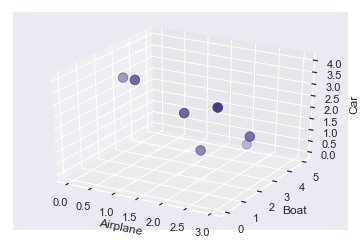

In [138]:

fig = plt.figure()
ax = plt.axes(projection='3d')

x = [c[0] for c in corpus_vec]
y = [c[1] for c in corpus_vec]
z = [c[2] for c in corpus_vec]
ax.scatter3D(xs=x,ys=y,s=90,zs=z, color='darkslateblue')

ax.set_xlabel('Airplane')
ax.set_ylabel('Boat')
ax.set_zlabel('Car',rotation=90);


## To compare similarities between _documents_ or sentences: measure distance between pairs of vectors

In [6]:
from sklearn import metrics
toy_sim_mat = metrics.pairwise.cosine_similarity(corpus_vec)

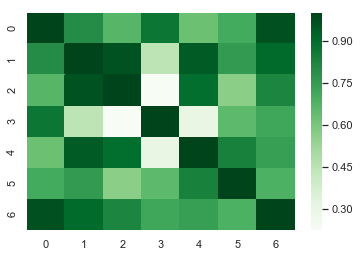

In [7]:
sns.heatmap(toy_sim_mat,cmap="Greens") 

In [8]:
toy_sim_mat[2][3], toy_corpus[2], toy_corpus[3], corpus_vec[2],corpus_vec[3]   # most dissimilar

(0.22283440581246222,
 'Car Car Car Airplane Car Airplane Airplane',
 'Boat Airplane Boat Boat Boat Boat Airplane',
 array([3, 0, 4], dtype=int64),
 array([2, 5, 0], dtype=int64))

In [9]:
toy_sim_mat[1][2], toy_corpus[1], toy_corpus[2], corpus_vec[1], corpus_vec[2] #most similar

(0.9621404708847279,
 'Car Airplane Car Boat Car Airplane',
 'Car Car Car Airplane Car Airplane Airplane',
 array([2, 1, 3], dtype=int64),
 array([3, 0, 4], dtype=int64))


## Some possible problems with this <font color=indianred> Bag of Words</font> approach. 
There are several issues with this approach when you consider the entire English dictionary. 

* (1) Typically there are words that are very common in general, so they appear in lots of documents. (“the”, “and”, “or” etc..)
    * these are typically referred to as _stopwords_ 
    

* (2) Within a given document or corpus, there are usually additional high frequency words that don't contribute much discriminating information between documents or sentences. 
    * These words can overwhelm the mathematical operations required to determine similarities.
    * For example in an article about March Madness words like NCAA or basketball or college don't provide additional information. We may not want to count repeating words as much.  
  
  
* (3) When words are used as atomic types for the basis of the vector space, they have no semantic relations (the similarity between them is zero, since they are perpendicular to each other). However, in reality we know that words can be similar in meaning, or even almost identical synonyms.
    * Thus the __bag of words__ moniker.
    
    
* (4) And of course syntactic structure is completely lost.

# A more complicated example the text of a book. 
* Utilize [Project Gutenberg](https://www.gutenberg.org/wiki/Main_Page) an online library of free eBooks.
* Examine a book to understand what this analysis looks like on a bigger corpus.
* Observe differences between some packages and pre-processing steps.

A couple of helper functions I wrote to download, ingest the raw_text and split it into chapters follows.

In [10]:
def load_pg_text(my_file):
    try:
        with open(my_file,'rb') as f:
            text=f.read()
            raw_text=text.decode('utf-8')
    except UnicodeDecodeError:
        with open(my_file) as f:
            raw_text=f.read()
            
    # first id the title & author
    tmp = [a.strip('\r') for a in raw_text.split('\n')]
    lines_to_find = ['*** START OF THIS PROJECT GUTENBERG', '*** END OF THIS PROJECT GUTENBERG']
    
    ll_to_find = [line for line in tmp if line.startswith(lines_to_find[0]) or line.startswith(lines_to_find[1])]
    try:
        start_idx = tmp.index(ll_to_find[0])
        end_idx = tmp.index(ll_to_find[1])
        title_str = ll_to_find[0].split('EBOOK')[-1].rstrip('***').strip(' ')
        if title_str == 'AROUND THE WORLD IN 80 DAYS':
            title_str=title_str.replace('80','EIGHTY')
        elif title_str == 'A JOURNEY TO THE INTERIOR':
            title_str=title_str.replace('TO THE','INTO THE')
            
        title_idx = [k for k,line in enumerate(tmp) if line.startswith(title_str)]
        try:
            title_index = max(title_idx) 
        except ValueError:
            print("**WARNING** starting at first line; may have excessive intro material")
            title_index = start_idx+1
        
    except IndexError:
        start_idx = [k for k, line in enumerate(tmp) if line.startswith('*END THE SMALL PRINT!')][0]
        end_idx = [k for k,line in enumerate(tmp) if line.startswith('End of the Project Gutenberg Etext')][-1]-1
        #title_str=" ".join([a for a in tmp[7:12] if a != ""])
        title_index = start_idx    
   
    try:
        last_index = next(i for i,v in zip(range(len(tmp)-1,-1,-1), reversed(tmp)) if 'THE END' in v)
    except StopIteration:
        last_index = end_idx-1
        
    return tmp[title_index:last_index]


class Chapter(object):
    """A class to contain chapters from Project Gutenberg text files"""
    def __init__(self, name, title, text, author, book_id, chapter_index, book):
        self.name=name
        self.title=title
        self.text=text
        self.author=author
        self.book_id=book_id
        self.chapter_index=chapter_index
        self.bookname=book
        

def split_into_chapters(text, book_id, key_word='Chapter ', authorname=None, bookname=None):
    if authorname is None:
        authorname = 'unknown'
    if bookname is None:
        bookname='unknown'
    chapter_idx = [k for k,line in enumerate(text) if key_word in line ]
    #print(len(chapter_idx))
    if key_word == 'THE STRAND MAGAZINE':
        chapter_idx = [c+6 for c in chapter_idx]
    else:
        key_word+=' '
        
    chapters=[] 
    for i,a in enumerate(chapter_idx):
        if i != len(chapter_idx)-1:
            b = chapter_idx[i+1]-1
        else: 
            b = len(text)
            
        chapter_name = text[a]
        chapter_title = text[a+2] #TOD improve this
        chapter_text = ' '.join([line.replace("\'","'") for line in text[a+3:b] if not line.startswith("[Illustration:")]) #drop illustration lines
        my_chapter = Chapter(chapter_name, chapter_title, chapter_text, authorname, book_id, i, bookname)
        chapters.append(my_chapter)
        
    return chapters


## Consider an example: <font color=darkslateblue> Around the World in 80 Days Text </font> 
* load the file & parse it
* split it into chapters (throw away other parts of the eBook like table of contents, publisher info, etc.)
* rejoin everything into a single corpus

In [139]:
raw_text=load_pg_text('data/103.txt')
chapters= split_into_chapters(raw_text,103, key_word='Chapter ', authorname='Verne')
print("We split this book into {n} chapters.".format(n=len(chapters)))
corpus_all_in_one = ' '.join([chap.text for chap in chapters])
print("The entire book has a length of {n} characters.".format(n=len(corpus_all_in_one)))

We split this book into 37 chapters.
The entire book has a length of 364686 characters.


# First consider all the words in this book

## Must <font color=darkslateblue> tokenize</font> (i.e. split into words) 

* the methods to tokenize exist in a number of python packages including `nltk`, `sklearn`, `spaCy`, & the standard library.
* you can also build your own (probably using regex).

### Let's start by using `nltk` and a simple word count using `collections.Counter`

We are interested in finding:
1. how many times a word occurs across the whole corpus (total number of occurrences)
2. How many documents a word occurs in

In [12]:
corpus_all_in_one[:100]

'THE ONE AS MASTER, THE OTHER AS MAN   Mr. Phileas Fogg lived, in 1872, at No. 7, Saville Row, Burlin'

In [13]:

from nltk.tokenize import word_tokenize

try:  # py3
    all_tokens = [t for t in word_tokenize(corpus_all_in_one)]
except UnicodeDecodeError:  # py27
    all_tokens = [t for t in word_tokenize(corpus_all_in_one.decode('utf-8'))]

print("Total number of words: {} in {} unique tokens.".format(len(all_tokens), len(set(all_tokens))))
from collections import Counter
total_term_frequency = Counter(all_tokens)

Total number of words: 75755 in 7467 unique tokens.


In [14]:
all_tokens[:18]

['THE',
 'ONE',
 'AS',
 'MASTER',
 ',',
 'THE',
 'OTHER',
 'AS',
 'MAN',
 'Mr.',
 'Phileas',
 'Fogg',
 'lived',
 ',',
 'in',
 '1872',
 ',',
 'at']

### Aside
In 1935, linguist George Zipf noted that in any big text, the $n^{th}$ most frequent word appears with a frequency of about $1/n$ of the most frequent word. He get's credit for Zipf's Law, even though Felix Auerbach made the same observation in 1913. If we plot the frequency of words, most common first, on a log-log plot, they should come out as a straight line if Zipf's Law holds. 

In [15]:
def plot_ordered_term_frequency(term_freq):
    M = term_freq.most_common(1)[-1][-1]#['the']
    plt.yscale('log'); plt.xscale('log'); plt.title('Frequency of n-th most frequent word and 1/n line.')
    plt.plot([c for (w, c) in term_freq.most_common()], label="Actual Frequency")
    plt.plot([M/i for i in range(1, len(term_freq)+1)], label="Zipf's Law");
    plt.ylabel('Word Frequency')
    plt.xlabel('Word index ordered by frequency');
    plt.legend()
    return

Here we see that it is a fairly close fit:

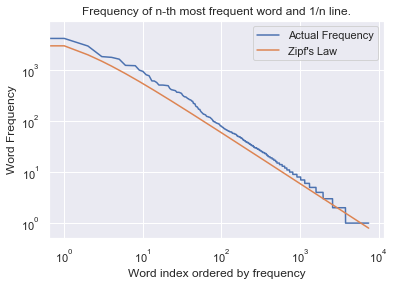

In [140]:
plot_ordered_term_frequency(total_term_frequency)

In [17]:
for word, freq in total_term_frequency.most_common(20):
    print("{w}\t{f}".format(w=word, f=freq))

,	5945
the	4151
.	2947
and	1829
of	1768
to	1628
``	1232
''	1223
a	1214
was	995
in	938
his	807
he	770
;	611
Fogg	608
at	568
not	507
with	507
The	506
that	501


## Wait a lot of these tokens aren't _even_ words (punctuation) or are just simple (non-informative words)
* We need to remove these stopwords and punctuation marks.
* Also this formuation of words as strings is case sensitive. Let's lowercase everything and reasses.
* Try again, this time splitting into sentences first (sentence tokenization).

In [18]:
from nltk.tokenize import sent_tokenize
import string

all_sentences = sent_tokenize(corpus_all_in_one)
print("{N} sentences found.".format(N=len(all_sentences)))

3655 sentences found.


In [141]:

tokens = [word for sent in sent_tokenize(corpus_all_in_one) for word in word_tokenize(sent)]
# remove words that are just punctuation
no_punct = list(filter(lambda word: word not in string.punctuation, tokens))
# lowercase everything so 
lc_tokens = [word.lower() for word in no_punct]
print("Total number of words: {} in {} unique tokens.".format(len(lc_tokens), len(set(lc_tokens))))
lc_total_term_frequency = Counter(lc_tokens)


Total number of words: 65476 in 6930 unique tokens.


In [143]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [142]:
for word, freq in lc_total_term_frequency.most_common(20):
    print("{w}\t{f}".format(w=word, f=freq))


the	4666
and	1894
of	1783
to	1647
a	1294
``	1232
''	1223
was	1007
he	987
in	978
his	840
at	634
fogg	611
it	577
that	525
on	522
not	519
with	512
had	511
as	437


In [21]:
from nltk.corpus import stopwords
print(len(stopwords.words('english')))

print(stopwords.words('english'))
stop_list = stopwords.words('english')+["--","``","''","...",'mr.',"'s","“","”","'nt","'ll","'re"]



179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [144]:
#stop_list = stopwords.words('english') + list(my_punct)+["--","``","''","..."]

tokens_no_stop = [token for token in lc_tokens if token not in stop_list]

total_term_frequency_no_stop = Counter(tokens_no_stop)
ntokens = len(total_term_frequency_no_stop.keys())
print("This reduces our corpus to containing {m} words in {n} unique tokens.".format(m=len(tokens_no_stop),n=ntokens))

for word, freq in total_term_frequency_no_stop.most_common(20):
    print("{w}\t{f}".format(w=word, f=freq))


This reduces our corpus to containing 31535 words in 6800 unique tokens.
fogg	611
passepartout	399
would	286
fix	245
phileas	222
said	192
one	168
could	140
aouda	136
time	126
master	123
upon	119
train	119
sir	103
two	101
hundred	97
replied	93
steamer	91
hours	90
thousand	88


### some of these _unique_ tokens mean almost the same thing. 
for example:
*  `replied`, `reply`, `replying` 
* `hour` & `hours`

#### Approach:
* Stemming rule based (a bit quicker than the more robust Lemmatization)

In [23]:
[(w,f) for w,f in total_term_frequency.items() if w.startswith("hour")]

[('hours', 90), ('hour', 55)]

In [25]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

In [26]:
set([a for a in tokens_no_stop if stemmer.stem(a) in ['repli','hour']])

{'hour', 'hours', 'replied', 'replies', 'reply', 'replying'}

In [27]:


stemmed_tokens = [stemmer.stem(token) for token in tokens_no_stop]

total_term_frequency_stemmed = Counter(stemmed_tokens)
ntokens = len(total_term_frequency_stemmed.keys())
print("This reduces our corpus to containing {m} words in {n} unique tokens.".format(m=len(stemmed_tokens),n=ntokens))
for word, freq in total_term_frequency_stemmed.most_common(20):
    print("{w}\t{f}".format(w=word, f=freq))


This reduces our corpus to containing 31535 words in 4770 unique tokens.
fogg	611
passepartout	399
would	286
fix	253
philea	222
said	192
one	169
day	161
time	147
hour	145
could	140
go	140
train	139
aouda	136
master	125
upon	119
pass	113
steamer	110
repli	103
sir	103


In [29]:
# wrap this all into a function
def nltk_tokenize(text, stop_words=stop_list, stemmer=SnowballStemmer("english", ignore_stopwords=True)):
    # tokenize
    tokens = [word for sent in sent_tokenize(text) for word in word_tokenize(sent)]
    # remove words that are just punctuation
    no_punct = list(filter(lambda word: word not in string.punctuation, tokens))
    # lowercase everything 
    lc_tokens = [word.lower() for word in no_punct]
    # remove stopwords
    tokens_no_stop = [token for token in lc_tokens if token not in stop_words]
    # stem with given stemmer
    if stemmer:
        stemmed_tokens = [stemmer.stem(token) for token in tokens_no_stop]
        return stemmed_tokens
    else:  
        return tokens_no_stop
    




## Apply this revised processing to each chapter

In [145]:
by_chap_tokens = []
by_chap_counts = []
for chapter in chapters:
    ctokens = [t for t in nltk_tokenize(chapter.text)]
    
    #print(chapter.name,len(ctokens))
    by_chap_tokens.append(ctokens)
    chapCounter = Counter(ctokens)
    by_chap_counts.append(chapCounter)


In [146]:
def get_chapter_stats(chapter_tokens, chapters):
    data = []
    for k, c in enumerate(chapters):
        nwords = len(by_chap_tokens[k])
        ntokens = len(set(by_chap_tokens[k]))
        name = c.name
        #nchar = 
        data.append([nwords,ntokens,name])
    df = pd.DataFrame(data, columns=['words','tokens','name'])
    return df
                    

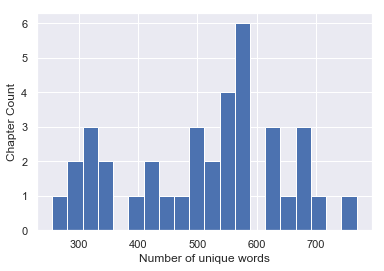

In [147]:
chp_stats =get_chapter_stats(by_chap_tokens, chapters)
chp_stats.tokens.hist(bins=20)
plt.xlabel('Number of unique words');
plt.ylabel('Chapter Count');

In [33]:
chp_stats

,words,tokens,name
0,728,499,Chapter I
1,573,427,Chapter II
2,1028,577,Chapter III
3,491,330,Chapter IV
4,490,340,Chapter V
5,660,424,Chapter VI
6,389,255,Chapter VII
7,516,334,Chapter VIII
8,826,538,Chapter IX
9,817,548,Chapter X


## Question. Can we distinguish or cluster the chapters based upon the words in them?

In [34]:
chap_top5 =[]
chap_top5freq =[]
for k,c in enumerate(by_chap_counts):
    top5 = []
    freqtop5 = []
    for word, freq in c.most_common(5):
        top5.append(word)
        freqtop5.append(freq)
    chap_top5.append(top5)
    chap_top5freq.append(freqtop5)

In [35]:
chap_top5

[['fogg', 'philea', 'savill', 'row', 'club'],
 ['passepartout', 'fogg', 'master', 'one', 'hous'],
 ['fogg', 'stuart', 'philea', 'thousand', 'day'],
 ['passepartout', 'fogg', 'master', 'good', 'twenti'],
 ['fogg', 'philea', 'would', 'bet', 'appear'],
 ['fix', 'consul', 'suez', 'steamer', 'mongolia'],
 ['consul', 'passport', 'octob', 'fix', 'visa'],
 ['fix', 'passepartout', 'london', 'monsieur', 'go'],
 ['steamer', 'bombay', 'mongolia', 'fix', 'fogg'],
 ['bombay', 'fogg', 'india', 'calcutta', 'fix'],
 ['fogg', 'sir', 'franci', 'passepartout', 'would'],
 ['would', 'fogg', 'sir', 'franci', 'guid'],
 ['fogg', 'guid', 'sir', 'franci', 'parse'],
 ['passepartout', 'fogg', 'would', 'philea', 'hand'],
 ['fogg', 'passepartout', 'judg', 'said', 'philea'],
 ['hong', 'kong', 'would', 'fix', 'fogg'],
 ['passepartout', 'fix', 'fogg', 'aouda', 'master'],
 ['fogg', 'would', 'passepartout', 'steamer', 'hong'],
 ['passepartout', 'fix', 'fogg', 'said', 'master'],
 ['fogg', 'fix', 'aouda', 'would', 'could']

In [36]:
top5overChap = list(set([item for sublist in chap_top5 for item in sublist]))

In [37]:
n_top_words = len(top5overChap)
n_top_words

70

In [38]:
top5counts = np.zeros((len(chapters),n_top_words))
for j, chp in enumerate(chap_top5):
    for k,word in enumerate(chp):
        val = chap_top5freq[j][k]
        i = top5overChap.index(word)
        #print(j,k,i, word, val)
        top5counts[j][i]=val

['club', 'row', 'savill', 'fogg', 'philea']
['mongolia', 'suez', 'fix', 'steamer', 'consul']
['mongolia', 'fix', 'bombay', 'fogg', 'steamer']
['captain', 'speedi', 'fogg', 'philea', 'henrietta']


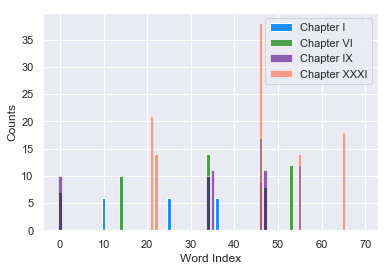

In [39]:
plt.bar(x=range(n_top_words), height=top5counts[0], color='dodgerblue',label=chp_stats.loc[0,'name'])
plt.bar(x=range(n_top_words), height=top5counts[5], alpha=0.8, color='forestgreen',label=chp_stats.loc[5,'name'])
plt.bar(x=range(n_top_words), height=top5counts[8], alpha=0.6, color='indigo', label=chp_stats.loc[8,'name'])
plt.bar(x=range(n_top_words), height=top5counts[32], alpha=0.6, color='tomato',label=chp_stats.loc[30,'name'])
print([top5overChap[a] for a in np.where(top5counts[0]>0)[0]])
print([top5overChap[a] for a in np.where(top5counts[5]>0)[0]])
print([top5overChap[a] for a in np.where(top5counts[8]>0)[0]])
print([top5overChap[a] for a in np.where(top5counts[32]>0)[0]])
plt.legend()
plt.ylabel('Counts');
plt.xlabel('Word Index');


# To approach this more seriously we would want to address the relative importance of our words (i.e. issues (1) and (2) above. 

## Enter <font color=indianred> TF-IDF</font> 

### Term Frequency Inverse Document Frequency (tf-idf) is a good way to address the concerns of overcounting or overweighting certain words in corpus.

Given $t$ represents a term, $d$ represents a document and $D$ is the set of all documents, the general equation is

\begin{equation}
tf\mbox{-}idf(t,d,D) = tf(t,d) \cdot idf(t,D)
\end{equation}

* TF: Term Frequency 

How often does a word occur? TF simply counts the number of times a word is in a document -- the most frequently occurring words (especially after stop-words have been removed) give some insight into the content of a particular document. 

If the documents you are comparing are of different lengths you probably need to adjust the simplest version (raw count) by document length.  


* IDF: (Inverse document frequency)

IDF measures how much information a given word provides. The idea is to __penalize__ the total count of a word in a document by how often it appears in all of the documents. The higher this number the less valuable the word is because it contains less information that can distinguish the document. In the extreme case, where the word appears in large fraction of the documents, usually it is even better to completely eliminate the count. These are the stopwords, and/or corpus-specific stopwords.

A good heuristic is \begin{equation} 
idf(t,D) = \log\frac{N}{1+n_t}
\end{equation}
where $N$ is the number of documents ($N=|D|$) and $n_t$ is the number of documents where term $t$ appears in it. 

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


#### rejoin each token for each chapter into a single string for that chapter

In [41]:
chap_corpus = [" ".join(a) for a in by_chap_tokens]

In [42]:
vectorizer.fit(chap_corpus)
chap_corp_vec = vectorizer.transform(chap_corpus)

In [43]:
chap_corp_vec.shape # number of chapters by vocabulary size

(37, 4637)

### Create a couple helper functions to cluster the text based upon the TFIDF

In [44]:

from sklearn import cluster
def cluster_text(X,nclusters=6, random_state= 1155, show_plot=True):
    clstr = cluster.KMeans(random_state=random_state, n_clusters=nclusters)
    clstr.fit(X)
    if show_plot:
        obs_per_cluster = pd.Series(clstr.labels_).value_counts()
        obs_per_cluster.plot(kind="bar",color='cadetblue')
        plt.ylabel('Number of Observations')
        plt.xlabel('Cluster ID')
        plt.show()
    return clstr

In [45]:
def extract_tfidf_term_fractions(clusters,vectorizor,my_matrix,n_terms = 100):
    vocab = vectorizor.get_feature_names()
    ## get the rows that correspond to a given cluster_label:
    #clust_id = 1
    nclusters = clusters.n_clusters
    
    clst_labels = pd.Series(clusters.labels_)
    nobs = len(clst_labels.value_counts())
    #print(nclusters,nobs)
    
    if nobs < nclusters:
        nclusters=nobs
    
    
    for k in range(nclusters):
        obs_idx = clst_labels[clst_labels == k].index.tolist()
        # reduce to the average value for each word
        vect_contributions = my_matrix[obs_idx].mean(axis=0).tolist()[0]
        df_vect = pd.Series(vect_contributions,index=vocab)
        if len(vocab)>n_terms: 
            df_vect.sort_values(ascending=False,inplace=True)
        # just print all of them as they are
        #    
        #    df_vect.plot(kind='bar',color='steelblue',rot=45)
        #else:
        df_vect[:n_terms].plot(kind='bar',color='steelblue',rot=45)
        plt.title("Top terms from Cluster %d (n = %d)" %(k,len(obs_idx)),fontsize=20)
        plt.ylabel('Mean TFIDF value')
        plt.show()    
            
            
    return

def plot_single_cluster_tfidf_terms(clusters,vectorizor,my_matrix,n_terms = 100, cluster_id =0):
    vocab = vectorizor.get_feature_names()
    ## get the rows that correspond to a given cluster_label:
    
    clst_labels = pd.Series(clusters.labels_)
       
    #for k in range(nclusters):
    obs_idx = clst_labels[clst_labels == cluster_id].index.tolist()
        # reduce to the average value for each word
    vect_contributions = my_matrix[obs_idx].mean(axis=0).tolist()[0]
    df_vect = pd.Series(vect_contributions,index=vocab)
    if len(vocab)>n_terms: 
        df_vect.sort_values(ascending=False,inplace=True)
        # just print all of them as they are
        #    
        #    df_vect.plot(kind='bar',color='steelblue',rot=45)
        #else:
    df_vect[:n_terms].plot(kind='bar',color='darkslateblue',rot=45)
    plt.title("Top terms from Cluster %d (n = %d)" %(cluster_id,len(obs_idx)),fontsize=20)
    plt.ylabel('Mean TFIDF value')
    plt.show()    
            
            
    return

## Cycle through a set of cluster sizes, score the cluster coherence & select number of clusters that yields the best score

In [46]:
def create_and_score_clusters(vector, min_size=2,max_size=20,metric='silhouette',show_plot=True,**kwargs):
    cluster_score_info ={}
    v2 = vector.dot(vector.T)
    for k in range(min_size,max_size,1):
        tmp_cluster = cluster_text(vector, nclusters=k, show_plot=False, **kwargs)
        if metric == 'silhouette':
            cluster_score_info[k]=metrics.cluster.silhouette_score(v2, labels=tmp_cluster.labels_)
    if show_plot:
        pair = sorted(cluster_score_info.items()) # = [(x,y) for x,y in a.items()]
        x,y = zip(*pair)
        plt.plot(x,y)
        plt.xlabel('Number of Clusters')
        plt.ylabel('Cluster Score')
        
    return cluster_score_info

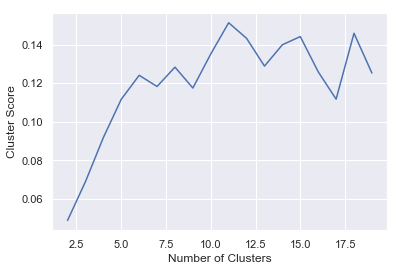

In [47]:
a = create_and_score_clusters(chap_corp_vec)

In [48]:
print("Max score in cluster")
[(k,v) for k,v in a.items() if v == max(a.values())]

Max score in cluster


[(11, 0.15132345049129728)]

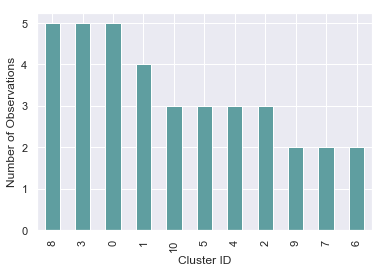

In [49]:
c_11 = cluster_text(chap_corp_vec, nclusters=11)

In [50]:
metrics.cluster.silhouette_score(np.dot(chap_corp_vec,chap_corp_vec.T), labels=c_11.labels_)

0.15132345049129728

In [51]:
[c_11.labels_[a] for a in [0,5,8, 31 ]]

[9, 1, 1, 7]

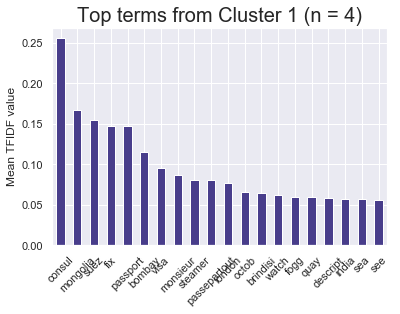

In [52]:
plot_single_cluster_tfidf_terms(c_11, vectorizer, chap_corp_vec, n_terms=20, cluster_id = 1)

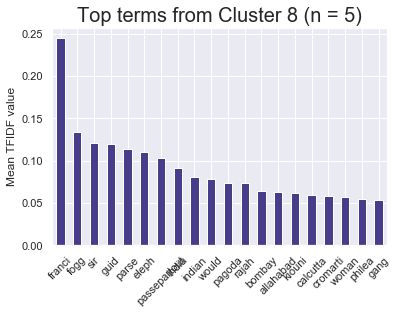

In [53]:
plot_single_cluster_tfidf_terms(c_11, vectorizer, chap_corp_vec, n_terms=20, cluster_id = 8)

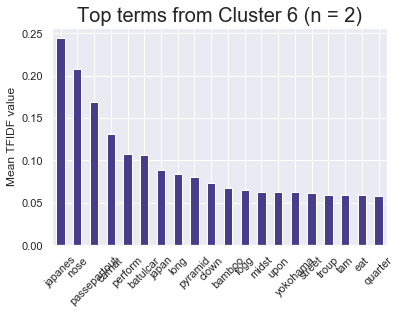

In [55]:
plot_single_cluster_tfidf_terms(c_11, vectorizer, chap_corp_vec, n_terms=20, cluster_id=6)

# Can we compare one document to another?

In [56]:
def setup_document_list(fname, train=True):
    pg_text = []
    book_chapters = []
    if train:
        tval = 1
    else:
        tval = 0
    # ingest meta_file
    df = pd.read_csv(fname)
    for i, row in df[df.train==tval].iterrows():
        bid = (row.file).split('/')[1].rstrip('.txt').split('-')[0]
        #print(bid, row.file)
        raw_text = load_pg_text(row.file)  
        print(len(raw_text), row.author, row.book)
        chapters = split_into_chapters(raw_text, int(bid), key_word=row.breakword, authorname=row.author, bookname=row.book)
        print("We split {b} into {n} chapters.".format(b=row.book, n=len(chapters)))
        book_chapters.append(len(chapters))
        pg_text.append(chapters)
    
    return pg_text, df, book_chapters

In [57]:
pg_text, df, book_chapters = setup_document_list('document_listing.txt')


8013 Verne 80days
We split 80days into 37 chapters.
19214 Verne Leagues
We split Leagues into 47 chapters.
13036 Austen Pride
We split Pride into 61 chapters.
16242 Austen Emma
We split Emma into 55 chapters.
12691 Doyle Return
We split Return into 13 chapters.
11942 Doyle Holmes
We split Holmes into 12 chapters.


In [58]:
pg_text_test, df2, bk_ch2 = setup_document_list('document_listing.txt', train=False)

9595 Verne Journey
We split Journey into 45 chapters.
12822 Austen Sense
We split Sense into 50 chapters.
6833 Doyle Hound
We split Hound into 15 chapters.


## Preprocess all the text in each of the chapters to be input into a TF-IDF formulation:
* tokenize
* remove stop words
* remove punctuation

In [59]:
clean_chapters = []
clean_corpus = []
clean_by_book =[]
book_info = []
for book in pg_text:
    by_book = []
    for k,ch in enumerate(book):
        new_text = " ".join([token for token in nltk_tokenize(ch.text)])
        clean_chapter = Chapter(ch.name,ch.title, new_text, ch.author, ch.book_id, k, ch.bookname)
        clean_chapters.append(clean_chapter)
        clean_corpus.append(new_text)
        by_book.append(new_text)
        if k == 0:
            book_info.append([ch.author, ch.bookname, ch.book_id])
    by_book = "".join([line for line in by_book])
    clean_by_book.append(by_book)

In [60]:
len(clean_corpus), len(clean_by_book)

(225, 6)

In [61]:
clean_by_book[0][:100]

'one master man philea fogg live 1872 7 savill row burlington garden hous sheridan die 1814 one notic'

In [62]:
clean_by_book[1][:100]

'runaway reef year 1866 mark bizarr develop unexplain downright inexplic phenomenon sure one forgotte'

In [63]:
clean_corpus[85][:60]

'bennet among earliest wait bingley alway intend visit though'

## Two outputs: 
1. A corpus that is 1 row for each chapter
2. A corpus that is 1 row for each book

## let's start with the second one and see if we can determine differences between these authors


In [64]:
#df[df.train==1][['author','book',#
book_df = pd.DataFrame(book_info, columns=['Author','BookName','BookId'])
book_df['chapters']=book_chapters
#book_df

## Start with a _tf-idf_ vectorizer 

In [65]:
tfidf_vectorizer=TfidfVectorizer()
tfidf_by_book_vec = tfidf_vectorizer.fit_transform(clean_by_book)
tfidf_by_book_feature_names = tfidf_vectorizer.get_feature_names()

In [66]:
np.shape(tfidf_by_book_vec), len(tfidf_by_book_feature_names)

((6, 14935), 14935)

In [67]:
tfidf_by_book_feature_names[-8:]

['zinc', 'zoantharia', 'zodiac', 'zone', 'zoo', 'zoolog', 'zoophyt', 'zoroast']

## this is the dimension of our Document to Word matrix
* 6 by 14935

In [68]:
b2b_TF_dist = np.dot(tfidf_by_book_vec, tfidf_by_book_vec.T).toarray()

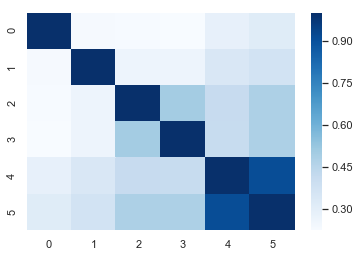

In [69]:
sns.heatmap(b2b_TF_dist,cmap='Blues')

In [70]:
book_df

,Author,BookName,BookId,chapters
0,Verne,80days,103,37
1,Verne,Leagues,2488,47
2,Austen,Pride,1342,61
3,Austen,Emma,158,55
4,Doyle,Return,221,13
5,Doyle,Holmes,48320,12


If you squint you might be able to guess that 4 & 5 (Doyle) are closest with 2 & 3 (Austen) are next closest.

### Retry at Chapter-level

In [71]:
chapter_tfidf_vectorizer=TfidfVectorizer()
chapter_tfidf_vec = chapter_tfidf_vectorizer.fit_transform(clean_corpus)
chapter_tfidf_feature_names = chapter_tfidf_vectorizer.get_feature_names()

In [72]:
len(chapter_tfidf_feature_names)

14725

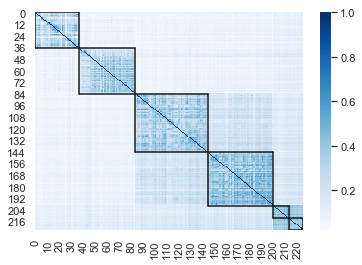

In [73]:
c2c_TF_dist = np.dot(chapter_tfidf_vec, chapter_tfidf_vec.T).toarray()
sns.heatmap(c2c_TF_dist,cmap='Blues')
ch_boundaries = book_df.chapters.cumsum().values.tolist()
ch_boundaries.insert(0,0)
total = max(ch_boundaries)
for i,v in enumerate(ch_boundaries):
    if v != total:
        w = ch_boundaries[i+1]
        #for v in book_df.chapters.cumsum().values():
        
        plt.axhline(y=v, xmin=v/total, xmax=w/total,color='k')
        plt.axhline(y=w, xmin=v/total, xmax=w/total,color='k')
        plt.axvline(x=v, ymin=1-v/total, ymax=1-w/total,color='k')
        plt.axvline(x=w, ymin=1-v/total, ymax=1-w/total,color='k')
    

## This is cool $\rightarrow$ chapters of contiguous books are more self-similar 
## But harder to see similarities between authors (particularly Verne)

# This is all well and good.
* I've shown that I can group text into similar clusters and identify the top words (features) in each cluster. 

## However is there more we can do?

## What about <font color=indianred> Topic Modeling </font>?

Topic Modeling attempts to use machine learning to infer some sort of abstract "topics" within a collection of documents. It works by identifying informative collocation on our bag of words corpus. There are different ways to approach determining these topics. Two of the most common are _LDA_ and _NMF_. The Topic Modeling process thus assigns documents to a mixture of these topics and thus words can be associated to varying degrees into these different topics. 


### LDA: Latent Dirichlet Allocation is a probabalistic graphical model
* Note in ML LDA can also represent not to be confused with Linear Discriminate Analysis which is a method to characterize/distinguish between multiple classes.
* <blockquote> Latent Dirichlet allocation (LDA) is a generative probabilistic model of a corpus. The basic idea is
that documents are represented as random mixtures over latent topics, where each topic is characterized
by a distribution over words.
    
    -- Blei, Ng & Jordan J Machine Learning Research 3 (2003) 993-1022 [Latent Dirichlet Allocation](http://ai.stanford.edu/~ang/papers/jair03-lda.pdf)</blockquote> 

* In `python`, LDA is implemented in the goto ML library, `sklearn`. However the best python implementation (in terms of speed and scalability) is `Gensim`.


### NMF: Non-negative Matrix Factorization just uses straightforward linear algebra
* Implemented in  `sklearn`
* The document-word matrix, $\bf{D}$, is factorized into two matrices:, $\bf{T}$ and $\bf{W}$ as 
\begin{equation}
\bf{D} = \bf{T} \bf{W}
\end{equation}

* Effectively one can think of this as a dimensional reduction, projecting the  document-word matrix $\bf{D}$ into a document-topic matrix $\bf{T}$ useful for assessing similarities and gaining some idea of what the document is about and topic-word matrix $\bf{W}$  is generated in the process.

### <font color=dodgerblue> What is the  catch?</font> You have to specify the number of topics to assign.


## Apply both

In [74]:
n_features=2000

# Use it-idf
tfidf_vectorizer=TfidfVectorizer(max_df=0.95, min_df=2,max_features=n_features)
tfidf_book_vec = tfidf_vectorizer.fit_transform(clean_by_book)
tfidf_book_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
tf_book_vec = tf_vectorizer.fit_transform(clean_by_book)
tf_book_feature_names = tf_vectorizer.get_feature_names()


In [75]:
tfidf_book_vec.shape, tf_book_vec.shape

((6, 2000), (6, 2000))

In [76]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 3

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_book_vec)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=25, learning_method='online', 
                                learning_offset=50.,random_state=121).fit(tf_book_vec)


In [77]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {d}:".format(d=topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
print("\n NMF topics")
display_topics(nmf, tfidf_book_feature_names, no_top_words)
print("\n Now for LDA topics")
display_topics(lda, tf_book_feature_names, no_top_words)


 NMF topics
Topic 0:
holm watson sherlock shall lestrad street chair crime polic it
Topic 1:
mrs elizabeth harriet jane sister shall pleasur mother daughter aunt
Topic 2:
ned canadian professor ocean ship island surfac ve fish 000

 Now for LDA topics
Topic 0:
ned canadian ship professor island fish surfac ocean 000 wave
Topic 1:
holm mrs shall elizabeth jane harriet sister watson mother daughter
Topic 2:
steamer passeng english bombay indian franci car sail boat engin


In [95]:
def stack_plot_topics_per_instance(doctopic,doclist,legend=True):
    plots = []
    N,K = doctopic.shape
    ind = np.arange(N)
    width=0.5
    full_height=np.zeros(N)
    for k in range(K):
        color = plt.cm.coolwarm(k/K, 1)
        if k == 0:
            p = plt.bar(ind, doctopic[:, k], width, color=color)
        else:
            p = plt.bar(ind, doctopic[:, k], width, bottom=full_height, color=color)
        full_height += doctopic[:, k]
        plots.append(p)
    plt.ylim((0,1))
    plt.ylabel('Topics')
    plt.title('Topics in novels')
    plt.xticks(ind+width/2, doclist)
    plt.yticks(np.arange(0, 1, 10))
    topic_labels = ['Topic #{}'.format(k) for k in range(K)]
    if legend:
        plt.legend([p[0] for p in plots], topic_labels)
    plt.show()


In [81]:
lda_doctopic = lda.transform(tf_book_vec)
[np.round(x,2) for x in lda_doctopic]#/np.sum(lda_doctopic,axis=1,keepdims=True)

[array([0., 0., 1.]),
 array([1., 0., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0.04, 0.96, 0.  ]),
 array([0.05, 0.95, 0.  ])]

In [87]:
def plot_lda_topic_words(lda, topic_id, n_terms=20, terms=None):
    #if type(lda)=="<class 'gensim.models.ldamodel.LdaModel'":
    try:
        df = pd.DataFrame(lda.show_topic(topic_id,n_terms), columns=['term','weight']).set_index('term')
        
    except AttributeError:
        data = [(terms[i],lda.components_[topic_id][i] ) for i in lda.components_[topic_id].argsort()[:-n_terms -1:-1]]
        df =pd.DataFrame(data, columns=['term','weight']).set_index('term')
    
    df.plot(kind='bar')
    plt.title('Topic {d}'.format(d=str(topic_id)))
    #else:
    #    print("sorry not operational for type {} yet".format(type(lda)))
    
    return df

In [78]:
nmf_doctopic = nmf.transform(tfidf_book_vec)
nmf_doctopic#/np.sum(nmf_doctopic,axis=1,keepdims=True)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.21343412e+00],
       [0.00000000e+00, 8.23375481e-01, 0.00000000e+00],
       [0.00000000e+00, 8.24678658e-01, 0.00000000e+00],
       [8.23467533e-01, 0.00000000e+00, 0.00000000e+00],
       [7.82023387e-01, 4.10644585e-04, 0.00000000e+00]])

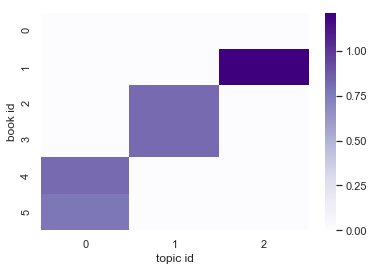

In [88]:
sns.heatmap(nmf_doctopic,cmap='Purples')#plt.xticks([1,2,3],['Topic 0', 'Topic 1','Topic 2'])
plt.ylabel('book id');
plt.xlabel('topic id');

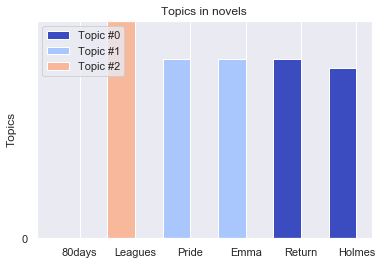

In [85]:
stack_plot_topics_per_instance(nmf_doctopic, book_df.BookName.values.tolist())

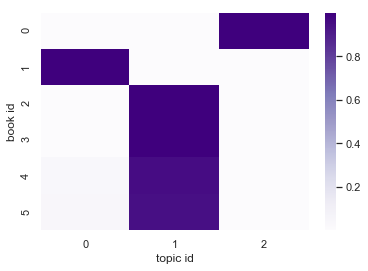

In [89]:
sns.heatmap(lda_doctopic,cmap='Purples')#plt.xticks([1,2,3],['Topic 0', 'Topic 1','Topic 2'])
plt.ylabel('book id');
plt.xlabel('topic id');

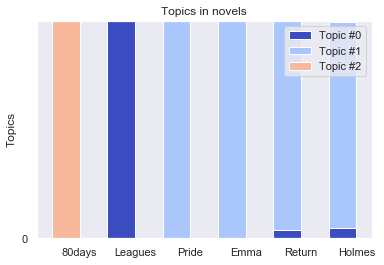

In [84]:
stack_plot_topics_per_instance(lda_doctopic,book_df.BookName.values.tolist())

,weight
term,
ned,338.029920
canadian,176.554396
ship,160.430675
professor,160.117176
island,154.162967
fish,148.054972
surfac,146.346678
ocean,138.147477
000,127.933055


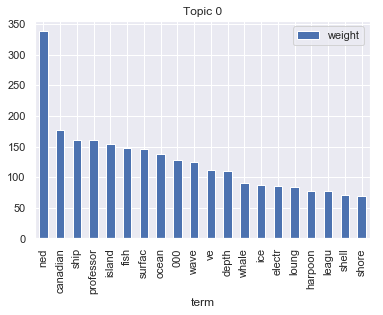

In [91]:
plot_lda_topic_words(lda, 0, n_terms=20, terms=tf_book_feature_names)

,weight
term,
holm,910.828978
mrs,842.785362
shall,478.233978
elizabeth,476.298583
jane,446.651221
harriet,379.163947
sister,280.922146
watson,222.609218
mother,189.294126


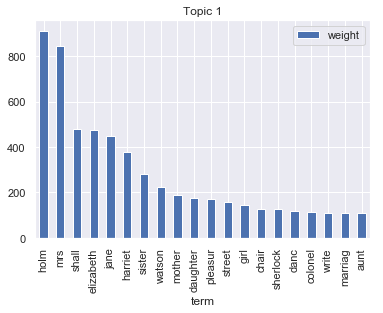

In [90]:
plot_lda_topic_words(lda, 1, n_terms=20, terms=tf_book_feature_names)

## Not so supprising that 3 topics didn't map exactly to the 3 authors

In [92]:

# Run LDA
lda42 = LatentDirichletAllocation(n_components=42, max_iter=25, learning_method='online', 
                                learning_offset=50.,random_state=121).fit(tf_book_vec)

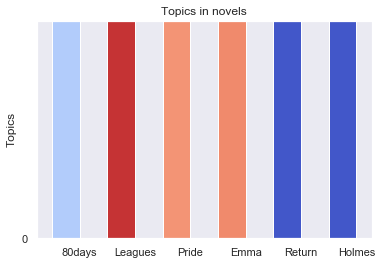

In [96]:
#plot_chaper_topic_probs(lda24, ctf_book_vec[11], 24)
lda_doctopic42 = lda42.transform(tf_book_vec)
stack_plot_topics_per_instance(lda_doctopic42,book_df.BookName.values.tolist(),legend=False)

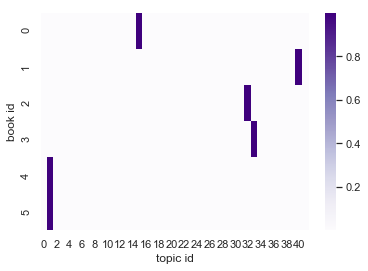

In [97]:
sns.heatmap(lda_doctopic42,cmap='Purples')#plt.xticks([1,2,3],['Topic 0', 'Topic 1','Topic 2'])
plt.ylabel('book id');
plt.xlabel('topic id');

In [99]:
[np.round(x,2) for x in lda_doctopic42]#/np.sum(lda_doctopic,axis=1,keepdims=True)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.

## from this perspective we see that some topics tend to live within a specific chapters
* some are specific and discriminating terms (high weight)
* others are diffuse and formed of generic terms (low weight)

,weight
term,
holm,898.151035
watson,218.729661
shall,190.028315
street,133.081283
sherlock,126.225569
chair,114.491176
lestrad,104.906047
crime,73.309437
murder,68.893255


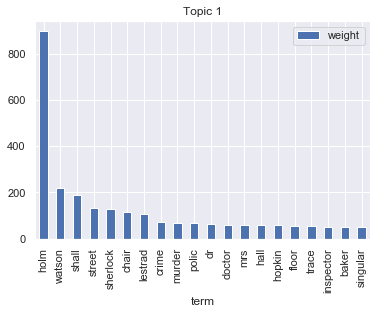

In [100]:
plot_lda_topic_words(lda42, 1, n_terms=20, terms=tf_book_feature_names)

,weight
term,
steamer,80.736794
passeng,50.897741
english,46.433593
bombay,45.751418
indian,44.920995
franci,40.477994
car,40.438137
sail,35.228856
boat,32.999831


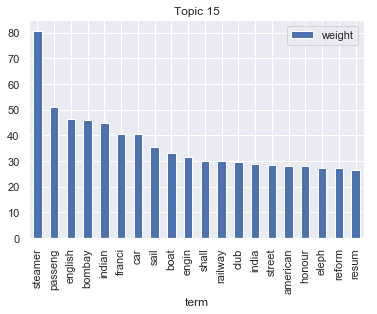

In [101]:
plot_lda_topic_words(lda42, 15, n_terms=20, terms=tf_book_feature_names)

,weight
term,
depth,0.404731
tool,0.356824
ve,0.351436
insid,0.343041
mayb,0.342893
milk,0.342778
wave,0.342271
kitti,0.341286
special,0.338333


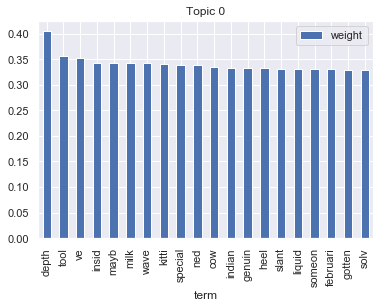

In [102]:
plot_lda_topic_words(lda42, 0, n_terms=20, terms=tf_book_feature_names)

# Better visualization: pyLDAvis

In [103]:
import pyLDAvis as vis
vis.enable_notebook()
import pyLDAvis.sklearn
import pyLDAvis.gensim

In [107]:
# first for the 3 topic model
pyLDAvis.sklearn.prepare(lda, tf_book_vec, tf_vectorizer)

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.181067 -0.042703       1        1  58.740794
0      0.154631 -0.069122       2        1  31.248055
2      0.026436  0.111825       3        1  10.011151, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
895   Default  1149.000000       holm  1149.000000  30.0000  30.0000
1197  Default  1066.000000        mrs  1066.000000  29.0000  29.0000
1214  Default   443.000000        ned   443.000000  28.0000  28.0000
619   Default   602.000000  elizabeth   602.000000  27.0000  27.0000
1573  Default   637.000000      shall   637.000000  26.0000  26.0000
1018  Default   565.000000       jane   565.000000  25.0000  25.0000
276   Default   231.000000   canadian   231.000000  24.0000  24.0000
1703  Default   106.000000    steamer   106.000000  23.0000  23.0000
862   Default   481.000000    harriet   481.000000  22.0000  22.0000
1011  Default   221.000000     island   221.000000  21.0000  21.0000
1754  Default   199.000000     surfac   199.000000  20.0000  20.0000
1588  Default   237.000000       ship   237.000000  19.0000  19.0000
1385  Default   251.000000  professor   251.000000  18.0000  18.0000
1243  Default   188.000000      ocean   188.000000  17.0000  17.0000
710   Default   212.000000       fish   212.000000  16.0000  16.0000
0     Default   174.000000        000   174.000000  15.0000  15.0000
1620  Default   355.000000     sister   355.000000  14.0000  14.0000
1724  Default   231.000000     street   231.000000  13.0000  13.0000
631   Default   104.000000    english   104.000000  12.0000  12.0000
1944  Default   187.000000       wave   187.000000  11.0000  11.0000
961   Default    95.000000     indian    95.000000  10.0000  10.0000
1288  Default    69.000000    passeng    69.000000   9.0000   9.0000
899   Default   152.000000     honour   152.000000   8.0000   8.0000
512   Default   150.000000      depth   150.000000   7.0000   7.0000
1943  Default   281.000000     watson   281.000000   6.0000   6.0000
374   Default   169.000000    colonel   169.000000   5.0000   5.0000
1952  Default   120.000000      whale   120.000000   4.0000   4.0000
211   Default   103.000000       boat   103.000000   3.0000   3.0000
1904  Default   179.000000         ve   179.000000   2.0000   2.0000
216   Default    51.000000     bombay    51.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
1394   Topic3     7.696817  protector     9.975566   2.0421  -6.7202
1793   Topic3    10.832480  territori    14.162631   2.0334  -6.3785
13     Topic3    10.027425       21st    13.405301   2.0111  -6.4557
1021   Topic3    20.354465    japanes    27.763813   1.9910  -5.7477
1092   Topic3    24.378634    locomot    33.538833   1.9825  -5.5673
758    Topic3    15.586112  frenchman    21.818789   1.9651  -6.0146
609    Topic3    20.391858     eighti    28.646555   1.9616  -5.7459
1531   Topic3     7.652582     saloon    10.957511   1.9425  -6.7260
325    Topic3    13.265051     chines    19.402881   1.9212  -6.1759
1939   Topic3    18.756218    warrant    27.893938   1.9046  -5.8295
1090   Topic3    22.807093  liverpool    35.843638   1.8494  -5.6339
1528   Topic3    38.079888       sail    66.613743   1.7422  -5.1213
960    Topic3    30.875181      india    53.458449   1.7525  -5.3311
961    Topic3    48.468689     indian    95.349828   1.6248  -4.8801
631    Topic3    49.957058    english   104.633129   1.5622  -4.8498
353    Topic3    31.500124       club    58.002314   1.6910  -5.3110
1743   Topic3    22.957644       suez    41.695031   1.7047  -5.6274
1997   Topic3    22.908413       york    43.624920   1.6573  -5.6295
630    Topic3    34.441047      engin    95.588979   1.2807  -5.2218
211    Topic3    35.574761       boat   103.089324   1.2375  -5.1894
85     Topic3    30.254095   a

In [108]:
#pyLDAvis.sklearn.prepare(nmf, tfidf_book_vec, tfidf_vectorizer)
# now for the 42 topic model
pyLDAvis.sklearn.prepare(lda42, tf_book_vec, tf_vectorizer)

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
40     0.194953  0.087773       1        1  29.981082
1      0.026939 -0.177305       2        1  29.948133
33    -0.236860  0.028604       3        1  15.552363
32    -0.263861  0.028551       4        1  14.556034
15     0.108819  0.018239       5        1   9.954095
10     0.004610  0.001465       6        1   0.000224
17     0.008750 -0.008767       7        1   0.000224
16    -0.001768  0.002317       8        1   0.000224
14     0.005106 -0.010258       9        1   0.000224
13     0.003455  0.003326      10        1   0.000224
12     0.003292  0.002957      11        1   0.000224
11     0.007000 -0.000451      12        1   0.000224
41     0.007835 -0.000082      13        1   0.000224
9     -0.020115 -0.001994      14        1   0.000224
18     0.003168  0.003895      15        1   0.000224
7      0.003501 -0.000609      16        1   0.000224
6      0.008032  0.001213      17        1   0.000224
5      0.012047  0.000694      18        1   0.000224
4     -0.000038  0.002448      19        1   0.000224
3     -0.005824  0.002369      20        1   0.000224
2      0.008841  0.001671      21        1   0.000224
8     -0.016744  0.005463      22        1   0.000224
20     0.007966 -0.001052      23        1   0.000224
19     0.008065  0.000155      24        1   0.000224
30     0.007932  0.002404      25        1   0.000224
39     0.006818  0.002664      26        1   0.000224
38     0.006066  0.000810      27        1   0.000224
37     0.009791  0.004307      28        1   0.000224
36    -0.000755  0.002991      29        1   0.000224
35     0.015672  0.006756      30        1   0.000224
34     0.007931 -0.002734      31        1   0.000224
31     0.006292  0.000535      32        1   0.000224
29     0.007185 -0.000212      33        1   0.000224
21     0.007806 -0.000285      34        1   0.000224
28     0.008484  0.001076      35        1   0.000224
27     0.008006  0.000560      36        1   0.000224
26     0.005756 -0.000277      37        1   0.000224
25     0.005039 -0.014491      38        1   0.000224
24     0.009598  0.000292      39        1   0.000224
23     0.001106  0.001889      40        1   0.000224
22     0.001965  0.001269      41        1   0.000224
0      0.008140  0.001823      42        1   0.000224, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
895   Default  1166.000000       holm  1166.000000  30.0000  30.0000
1197  Default  1045.000000        mrs  1045.000000  29.0000  29.0000
1214  Default   441.000000        ned   441.000000  28.0000  28.0000
619   Default   584.000000  elizabeth   584.000000  27.0000  27.0000
1573  Default   634.000000      shall   634.000000  26.0000  26.0000
862   Default   471.000000    harriet   471.000000  25.0000  25.0000
1018  Default   551.000000       jane   551.000000  24.0000  24.0000
1943  Default   285.000000     watson   285.000000  23.0000  23.0000
1385  Default   251.000000  professor   251.000000  22.0000  22.0000
276   Default   230.000000   canadian   230.000000  21.0000  21.0000
1620  Default   346.000000     sister   346.000000  20.0000  20.0000
1588  Default   237.000000       ship   237.000000  19.0000  19.0000
1011  Default   222.000000     island   222.000000  18.0000  18.0000
710   Default   211.000000       fish   211.000000  17.0000  17.0000
1754  Default   198.000000     surfac   198.000000  16.0000  16.0000
1724  Default   236.000000     street   236.000000  15.0000  15.0000
1243  Default   188.000000      ocean   188.000000  14.0000  14.0000
1944  Default   187.000000       wave   187.000000  13.0000  13.0000
0     Default   173.000000        000   173.000000  12.0000  12.0000
1191  Default   248.000000     mother   248.000000  11.0000  11.0000
1904  Default   180.000000         ve   180.000000  10.0000  10

## ingest the test data & compare

In [109]:
testclean_chapters = []
testclean_corpus = []
testclean_by_book =[]
#book_info = []
for book in pg_text_test:
    test_by_book = []
    for k,ch in enumerate(book):
        new_text = " ".join([token for token in nltk_tokenize(ch.text)])
        testclean_chapter = Chapter(ch.name,ch.title, new_text, ch.author, ch.book_id, k, ch.bookname)
        testclean_chapters.append(testclean_chapter)
        testclean_corpus.append(new_text)
        test_by_book.append(new_text)
        if k == 0:
            print(ch.bookname, ch.author)
        
    test_by_book = "".join([line for line in test_by_book])
    testclean_by_book.append(test_by_book)

Journey Verne
Sense Austen
Hound Doyle


In [110]:
test_by_book_vec = tfidf_vectorizer.transform(testclean_by_book)

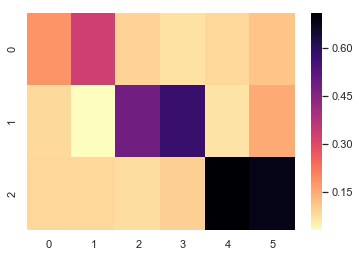

In [111]:
sns.heatmap(np.dot(test_by_book_vec,tfidf_book_vec.T).todense(),cmap='magma_r')

## Not so bad at assigning the best similarity for each author

## Let's retry with each chapter 
use `clean_corpus`

In [112]:
ctf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features)
ctf_book_vec = ctf_vectorizer.fit_transform(clean_corpus)
ctf_book_feature_names = ctf_vectorizer.get_feature_names()

In [113]:
chap_lda8 = LatentDirichletAllocation(n_components=8, max_iter=25, learning_method='online', 
                                                                learning_offset=50.,random_state=611).fit(ctf_book_vec)


In [114]:
chap_lda_doctopic = chap_lda8.transform(ctf_book_vec)
#[np.round(x,2) for x in chap_lda_doctopic]
#chap_lda_doctopic

,weight
term,
mrs,1067.109702
emma,936.773017
miss,920.744885
must,893.874811
said,876.028668
much,815.252691
think,712.533732
know,674.882902
everi,651.267823


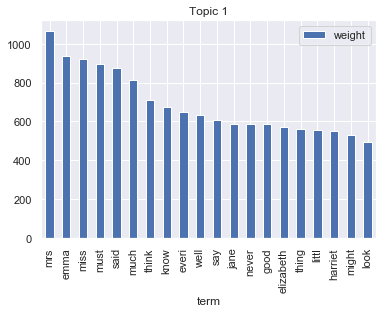

In [115]:
#plot_chaper_topic_probs(chap_lda14, ctf_book_vec[11], 24)
plot_lda_topic_words(chap_lda8, 1, n_terms=20, terms=ctf_book_feature_names)

In [116]:
pyLDAvis.sklearn.prepare(chap_lda8,  ctf_book_vec, ctf_vectorizer)

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.144297  0.035671       1        1  40.769387
0      0.054587  0.002416       2        1  30.393838
4     -0.116490  0.027165       3        1  16.135677
6     -0.016610 -0.130505       4        1   8.200017
2     -0.104431  0.047050       5        1   4.469435
3      0.033627  0.019153       6        1   0.010553
7      0.007440 -0.001549       7        1   0.010546
5     -0.002421  0.000598       8        1   0.010546, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
1513  Default  2328.000000       said  2328.000000  30.0000  30.0000
1167  Default  1137.000000        mrs  1137.000000  29.0000  29.0000
865   Default  1203.000000       holm  1203.000000  28.0000  28.0000
563   Default   935.000000       emma   935.000000  27.0000  27.0000
1783  Default  1164.000000      think  1164.000000  26.0000  26.0000
1172  Default  1405.000000       must  1405.000000  25.0000  25.0000
1137  Default  1080.000000       miss  1080.000000  24.0000  24.0000
1085  Default  1340.000000        man  1340.000000  23.0000  23.0000
1547  Default  1229.000000        see  1229.000000  22.0000  22.0000
993   Default  1232.000000       know  1232.000000  21.0000  21.0000
1869  Default  1226.000000       upon  1226.000000  20.0000  20.0000
1168  Default  1135.000000       much  1135.000000  19.0000  19.0000
1872  Default  1127.000000         us  1127.000000  18.0000  18.0000
1104  Default   841.000000        may   841.000000  17.0000  17.0000
966   Default   589.000000       jane   589.000000  16.0000  16.0000
332   Default  1042.000000       come  1042.000000  15.0000  15.0000
785   Default  1035.000000       good  1035.000000  14.0000  14.0000
704   Default   609.000000       fogg   609.000000  13.0000  13.0000
1931  Default  1358.000000       well  1358.000000  12.0000  12.0000
253   Default   851.000000    captain   851.000000  11.0000  11.0000
1048  Default  1131.000000      littl  1131.000000  10.0000  10.0000
559   Default   573.000000  elizabeth   573.000000   9.0000   9.0000
1782  Default   786.000000      thing   786.000000   8.0000   8.0000
437   Default   565.000000       dear   565.000000   7.0000   7.0000
830   Default   549.000000    harriet   549.000000   6.0000   6.0000
1183  Default   648.000000   nautilus   648.000000   5.0000   5.0000
1527  Default  1024.000000        say  1024.000000   4.0000   4.0000
1200  Default   947.000000      never   947.000000   3.0000   3.0000
1934  Default   484.000000     weston   484.000000   2.0000   2.0000
736   Default   789.000000     friend   789.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
1666   Topic8     0.019860      speed   163.252914   0.1428  -7.2546
1848   Topic8     0.027730        two   982.693019  -1.3184  -6.9208
704    Topic8     0.024966       fogg   609.796236  -0.9462  -7.0258
1189   Topic8     0.023004        ned   446.054458  -0.7154  -7.1077
1946   Topic8     0.022413      whose   394.510404  -0.6186  -7.1337
86     Topic8     0.020322       anim   232.956856  -0.1897  -7.2316
879    Topic8     0.023535       hour   607.810021  -1.0020  -7.0848
1697   Topic8     0.023268      still   599.682290  -0.9999  -7.0962
1423   Topic8     0.016736        ray    72.573376   0.7824  -7.4257
1872   Topic8     0.025197         us  1127.735328  -1.5518  -7.0166
778    Topic8     0.024713         go  1031.497253  -1.4820  -7.0360
1464   Topic8     0.023112      repli   677.397904  -1.1285  -7.1030
1058   Topic8     0.023208       long   787.103505  -1.2744  -7.0988
1039   Topic8     0.024097       like  1091.731179  -1.5640  -7.0612
450    Topic8     0.019851      degre   246.775138  -0.2708  -7.2551
113    Topic8     0.019692      arriv   236.687993  -0.2371  -7.2631
1602   Topic8     0.019190      sigh

## What else can we do to understand what the documents are about?
* Consider looking at the _importance_ of characters in a book
* Consider looking at the _attributes_ of those characters $\leftarrow$ simple way to get at sentiment
    - use `spacy` for this see https://spacy.io/ for more info.

In [117]:
import en_core_web_sm as spacy_en
nlp = spacy_en.load()

C:\Users\ARADER\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\ARADER\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:81: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fr

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:81: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b's

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:81: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b's

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:81: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b's

In [118]:
def rejoin_chapter_text(raw_text):
    bookname = raw_text[0].bookname
    by_chapter_text = [ch.text for ch in raw_text]
    print("Confirming that there were {n} chapters in {b}.".format(n=len(by_chapter_text),b=bookname))
    book_text = " ".join([chapt for chapt in by_chapter_text])
    book_doc = nlp(book_text)
    #How many sentences are in the book ?
    sentences = [s for s in book_doc.sents]   
    #league_character_offsets = get_character_offsets(leagues_doc)
    print("{M} sentences in this book.".format(M=len(sentences)))
    return book_doc
        

In [119]:
hound_doc = rejoin_chapter_text(pg_text_test[2])

Confirming that there were 15 chapters in Hound.
3936 sentences in this book.


In [120]:
from collections import defaultdict
NUM_BINS=30
def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurrences offsets and store them into a list.
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.
    :param doc: Spacy NLP parsed document
    :return: dict object in form
        {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    """

    character_offsets = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == 'PERSON' and ent.lemma_!= '':
            character_offsets[ent.lemma_].append(ent.start)

    return dict(character_offsets)



def plot_character_timeseries(character_offsets, character_labels, normalization_constant=None):
    """
    Plot characters' personal names specified in `character_labels` list as time series.
    :param character_offsets: dict object in form {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    :param character_labels: list of strings that should match some of the keys in `character_offsets`
    :param normalization_constant: int
    """
    x = [character_offsets[character_label] for character_label in character_labels]

    with plt.style.context('fivethirtyeight'):
        plt.figure()
        n, bins, patches = plt.hist(x, NUM_BINS, label=character_labels)
        plt.clf()

        ax = plt.subplot(111)
        for i, a in enumerate(n):
            ax.plot([float(x) / (NUM_BINS - 1) for x in range(len(a))], a, label=character_labels[i])

        matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['r', 'k', 'c', 'b', 'y', 'm', 'g', '#54a1FF'])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`
    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """

    adjectives = []
    for ent in doc.ents:
        if ent.lemma_ == character_lemma:
            for token in ent.subtree:
                if token.pos_ == 'ADJ':  # Replace with if token.dep_ == 'amod':
                    adjectives.append(token.lemma_)

    for ent in doc.ents:
        if ent.lemma_ == character_lemma:
            if ent.root.dep_ == 'nsubj':
                for child in ent.root.head.children:
                    if child.dep_ == 'acomp':
                        adjectives.append(child.lemma_)
                        
    adjectives = filter(lambda word: word != '-PRON-', adjectives)
    
    adj = Counter(adjectives)
    

    return adj

In [121]:
hound_characters = get_character_offsets(hound_doc)

In [122]:
[(k,len(v)) for k,v in hound_characters.items() if len(v) > 20]

[('sherlock holmes', 31),
 ('watson', 107),
 ('holmes', 147),
 ('mortimer', 70),
 ('charles', 78),
 ('henry baskerville', 23),
 ('stapleton', 49),
 ('henry', 130)]

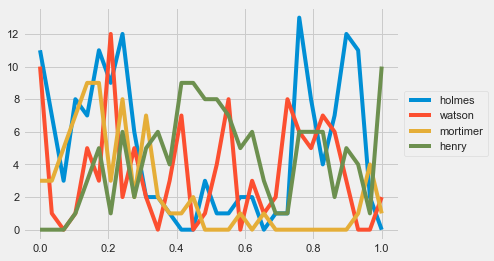

In [123]:
plot_character_timeseries(hound_characters, ['holmes','watson','mortimer','henry'])

In [125]:
for character in ['holmes', 'watson','mortimer','henry']:
    print(character, ':\t', [a for a in get_character_adjectives(hound_doc, character).keys()])

holmes :	 ['dear', 'all', 'next', 'silent', 'afoot']
watson :	 ['dear', 'which', 'alternative', 'long', 'short', 'quick', 'honest', 'ugly', 'dangerous', 'more', 'good', 'wise']
mortimer :	 ['several', 'strong', 'round', 'visible']
henry :	 ['queer', 'old', 'which', 'angry', 'other', 'secret', 'particular', 'deep', 'unprotected', 'interested', 'pleased', 'insensible']


In [126]:
emma_doc = rejoin_chapter_text(pg_text[3])
emma_characters = get_character_offsets(emma_doc)

Confirming that there were 55 chapters in Emma.
11961 sentences in this book.


In [127]:
[(k,len(v)) for k,v in emma_characters.items() if len(v) > 60]


[('woodhouse', 138),
 ('emma', 735),
 ('weston', 418),
 ('isabella', 67),
 ('knightley', 298),
 ('elton', 361),
 ('churchill', 65),
 ('frank churchill', 137),
 ('perry', 79),
 ('miss bates', 96),
 ('harriet', 319),
 ('jane fairfax', 76),
 ('jane', 178)]

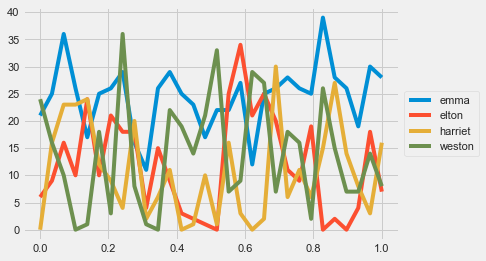

In [128]:
plot_character_timeseries(emma_characters, ['emma', 'elton','harriet', 'weston'])

In [130]:
#for character in ['emma', 'elton','harriet', 'weston']:
#    print(character, ':\t', [a for a in get_character_adjectives(emma_doc, character).keys()])

In [131]:
def plot_chaper_topic_probs(model, bow, n_topics=20):
    
    tdata = [x for x in range(1,n_topics+1)]
    df0 = pd.DataFrame(data=tdata)
    df0.columns=['topic']
    try:
        df = pd.DataFrame(model.get_document_topics(bow), columns=['topic','probability'])
        df['topic']=df['topic']+1
    except AttributeError:
        data = [(terms[i],lda.components_[topic_id][i] ) for i in lda.components_[topic_id].argsort()[:-n_terms -1:-1]]
        df =pd.DataFrame(data, columns=['term','weight']).set_index('term')
   

    df = pd.merge(df,df0, on='topic', how='outer')
    df.fillna(0,inplace=True)
    df.sort_values(by='topic',inplace=True)
    df.index=range(len(df))
    df.plot(kind='bar', x='topic',y='probability', color='coral')
        
    return

In [132]:
from gensim import models,  similarities, corpora
# gensim model uses a corpus and dictionary
dictionary = corpora.Dictionary([a.split() for a in clean_corpus])
corpus = [dictionary.doc2bow(text) for text in [a.split() for a in clean_corpus]]
#corpus = " ".join([word for word in by_book_vec if word in tf_feature_names])
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=20 )

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a d

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

In [133]:
test_dictionary = corpora.Dictionary([a.split() for a in testclean_corpus])
test_corpus = [test_dictionary.doc2bow(text) for text in [a.split() for a in testclean_corpus]]

In [134]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.015468 -0.003635       1        1  22.808327
13     0.002188  0.009708       2        1  13.983615
18     0.008578 -0.003195       3        1  13.429194
3     -0.004483 -0.001022       4        1  11.922739
7      0.002910  0.009912       5        1  10.010226
4     -0.000121 -0.001237       6        1   5.083838
5     -0.001807 -0.000271       7        1   4.428442
2     -0.005313 -0.002248       8        1   4.299328
19    -0.002096 -0.003644       9        1   3.929131
0     -0.007005 -0.002108      10        1   3.877234
10    -0.003079  0.008004      11        1   2.454283
15    -0.001952 -0.004547      12        1   1.335007
6     -0.000068  0.005760      13        1   0.914197
11    -0.003126 -0.002008      14        1   0.887326
17     0.002816  0.002106      15        1   0.207237
12     0.010238 -0.000856      16        1   0.194695
9      0.002658 -0.000515      17        1   0.169092
14     0.000698 -0.003470      18        1   0.055036
8      0.002303  0.002066      19        1   0.007687
16     0.012128 -0.008800      20        1   0.003357, topic_info=      Category         Freq     Term        Total  loglift  logprob
term                                                               
493    Default  2481.000000    would  2481.000000  30.0000  30.0000
98     Default  2512.000000    could  2512.000000  29.0000  29.0000
376    Default  2285.000000     said  2285.000000  28.0000  28.0000
303    Default  2123.000000      one  2123.000000  27.0000  27.0000
284    Default  1374.000000     must  1374.000000  26.0000  26.0000
13635  Default  1130.000000     holm  1130.000000  25.0000  25.0000
653    Default  1037.000000      n't  1037.000000  24.0000  24.0000
762    Default  1214.000000     upon  1214.000000  23.0000  23.0000
258    Default  1222.000000      man  1222.000000  22.0000  22.0000
478    Default  1245.000000     well  1245.000000  21.0000  21.0000
1728   Default  1008.000000       us  1008.000000  20.0000  20.0000
714    Default  1226.000000      see  1226.000000  19.0000  19.0000
15657  Default  1048.000000        ’  1048.000000  18.0000  18.0000
236    Default  1227.000000     know  1227.000000  17.0000  17.0000
1655   Default  1139.000000    think  1139.000000  16.0000  16.0000
283    Default  1084.000000     much  1084.000000  15.0000  15.0000
247    Default  1019.000000     like  1019.000000  14.0000  14.0000
449    Default  1181.000000     time  1181.000000  13.0000  13.0000
250    Default  1134.000000    littl  1134.000000  12.0000  12.0000
1061   Default  1027.000000      say  1027.000000  11.0000  11.0000
634    Default  1034.000000     look  1034.000000  10.0000  10.0000
757    Default   964.000000      two   964.000000   9.0000   9.0000
1361   Default  1102.000000     miss  1102.000000   8.0000   8.0000
108    Default   992.000000      day   992.000000   7.0000   7.0000
188    Default   975.000000       go   975.000000   6.0000   6.0000
290    Default   971.000000    never   971.000000   5.0000   5.0000
10131  Default  1155.000000     mrs.  1155.000000   4.0000   4.0000
83     Default   990.000000     come   990.000000   3.0000   3.0000
148    Default   851.000000     even   851.000000   2.0000   2.0000
266    Default   778.000000      may   778.000000   1.0000   1.0000
...        ...          ...      ...          ...      ...      ...
510    Topic20     0.014178      air   291.601166   0.3704  -6.6755
283    Topic20     0.040176     much  1084.720337   0.0983  -5.6339
569    Topic20     0.006582   electr   111.756744   0.5622  -7.4428
491    Topic20     0.021306     word   506.157379   0.2263  -6.2682
98     Topic20     0.071209    could  2512.854248  -0.1694  -5.0615
490    Topic20     0.025880  without   680.844238   0.1243  -6.0737
1352   Topic20     0.026443     long   722.290405   0.0867  -6.0522
247    Topic20     0.034033     like  1019.505554